In [49]:
# auto reload when source code changes
%load_ext autoreload
%autoreload 2

# include  folder in path
import os, sys, math
import numpy as np

sys.path.append('../sanode') # Adds higher directory to python modules path.

import aicsPlot

%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
pathList = []
pathList += [
    '/media/cudmore/data/san-density/SAN1/SAN1_head/aicsAnalysis/SAN1_head_ch2.tif',
    '/media/cudmore/data/san-density/SAN1/SAN1_mid/aicsAnalysis/SAN1_mid_ch2.tif',
    '/media/cudmore/data/san-density/SAN1/SAN1_tail/aicsAnalysis/SAN1_tail_ch2.tif',
    ]
pathList += [
    '/media/cudmore/data/san-density/SAN2/SAN2_head/aicsAnalysis/SAN2_head_ch2.tif',
    '/media/cudmore/data/san-density/SAN2/SAN2_mid/aicsAnalysis/SAN2_mid_ch2.tif',
    '/media/cudmore/data/san-density/SAN2/SAN2_tail/aicsAnalysis/SAN2_tail_ch2.tif',
    ]
# SAN3
pathList += [
    '/media/cudmore/data/san-density/SAN3/SAN3_head/aicsAnalysis/SAN3_head_ch2.tif',
    '/media/cudmore/data/san-density/SAN3/SAN3_mid/aicsAnalysis/SAN3_mid_ch2.tif',
    '/media/cudmore/data/san-density/SAN3/SAN3_tail/aicsAnalysis/SAN3_tail_ch2.tif',
    ]
# SAN4
pathList += [
    '/media/cudmore/data/san-density/SAN4/SAN4_head/aicsAnalysis/SAN4_head_ch2.tif',
    '/media/cudmore/data/san-density/SAN4/SAN4_mid/aicsAnalysis/SAN4_mid_ch2.tif',
    '/media/cudmore/data/san-density/SAN4/SAN4_tail/aicsAnalysis/SAN4_tail_ch2.tif',
    ]

tmp = aicsPlot.plot_hcn4_dist_hist(pathList, doPlot=False, verbose=False)

=== aicsMyocyteDistToVasc() /media/cudmore/data/san-density/SAN1/SAN1_head/aicsAnalysis/SAN1_head_ch2.tif
  making df with 1000000 rows from original 13420020
=== aicsMyocyteDistToVasc() /media/cudmore/data/san-density/SAN1/SAN1_mid/aicsAnalysis/SAN1_mid_ch2.tif
  making df with 1000000 rows from original 12913906
=== aicsMyocyteDistToVasc() /media/cudmore/data/san-density/SAN1/SAN1_tail/aicsAnalysis/SAN1_tail_ch2.tif
  making df with 1000000 rows from original 7935239
=== aicsMyocyteDistToVasc() /media/cudmore/data/san-density/SAN2/SAN2_head/aicsAnalysis/SAN2_head_ch2.tif
  making df with 1000000 rows from original 25325370
=== aicsMyocyteDistToVasc() /media/cudmore/data/san-density/SAN2/SAN2_mid/aicsAnalysis/SAN2_mid_ch2.tif
  making df with 1000000 rows from original 13135206
=== aicsMyocyteDistToVasc() /media/cudmore/data/san-density/SAN2/SAN2_tail/aicsAnalysis/SAN2_tail_ch2.tif
  making df with 1000000 rows from original 6222961
=== aicsMyocyteDistToVasc() /media/cudmore/data/san-

In [44]:
# load hcn4Dist.csv
# use seaborn to plot
import pandas as pd

path = 'hcn4Dist.csv'
df = pd.read_csv(path)

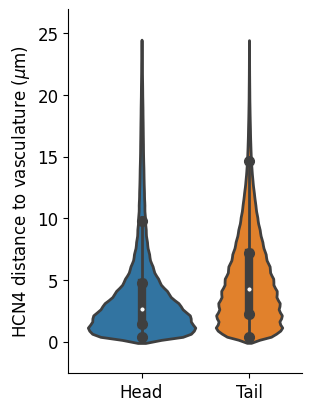

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

import aicsPlot
aicsPlot.defaultPlotLayout(plotForTalk=False)

sanStr = 'SAN2'
regionList = ['tail', 'head'] # to get logical order head-tail in plot

df2 = df[ df['SAN'] == sanStr]
df2 = df2[ df2['headMidTail'].isin(regionList) ]

fig, ax = plt.subplots(1, figsize=(3, 4))

split = False
linewidth = 2
ax = sns.violinplot(ax=ax, x="SAN", y="hcn4DistToVasc", hue='headMidTail', linewidth=linewidth, split=split, data=df2)

ax.set_ylabel('HCN4 distance to vasculature ($\mu$m)')
ax.set_xlabel('')
ax.margins(x=0.1, y=0.1)
regionList2 = ['Head', 'Tail']
plt.xticks([-0.2, .2], regionList2)
#plt.xticks([])

plt.legend(frameon=False)
ax.get_legend().remove()

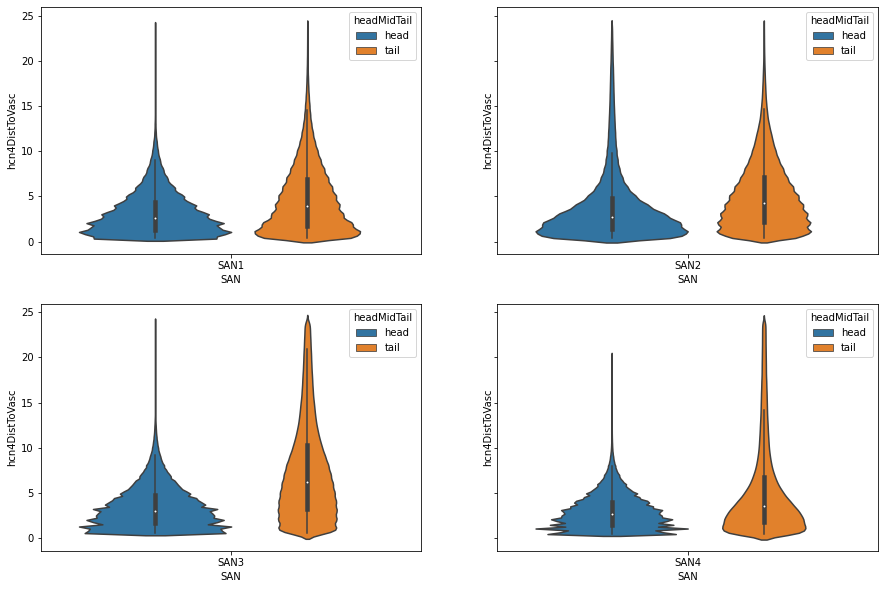

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

#n1 = len(df.index)
#print('n1:', n1)

sanList = ['SAN1', 'SAN2', 'SAN3', 'SAN4']
regionList = ['tail', 'head'] # to get logical order head-tail in plot

fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharey=True)
axs = np.ravel(axs)

for sanIdx, sanStr in enumerate(sanList):
    df2 = df[ df['SAN'] == sanStr]
    df2 = df2[ df2['headMidTail'].isin(regionList) ]

    #n2 = len(df2.index)
    #print('n2:', n2)

    # i now do this in aicsPlot.plot_hcn4_dist_hist()
    # random sample a subset of data
    if 0:
        nPlot = 500000 #1000000
        df2 = df2.sample(n=nPlot)
        n2 = len(df2.index)
        print('n2:', n2)

    split = False
    ax = sns.violinplot(ax=axs[sanIdx], x="SAN", y="hcn4DistToVasc", hue='headMidTail', split=split, data=df2)